# house pridiction using linear regression 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


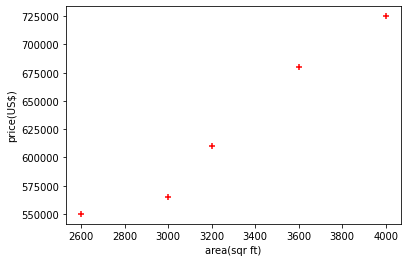

In [4]:
# ploting a scatter plot
% matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
# creating object for linear regression
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# predictiong price
reg.predict([[3300]])

array([628715.75342466])

Now how we have got this prediction
this is form the equation 
#### y = mx + c
where 
- y : is independent cariable
- m : slope of the exuation or gradient
- x : is dependent variable
- c : is intercept

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
# y=m*x+b i.e

135.78767123*3300+180616.43835616432

628715.7534151643

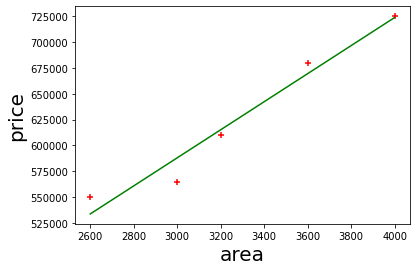

In [29]:
# visual representation of prediction
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='green')

In [30]:
# we have another csv file for which we have to generate home price
d=pd.read_csv('area.csv')
d.head()

,area
0,1000
1,1500
2,2000
3,2500
4,3000


In [31]:
type(d)

pandas.core.frame.DataFrame

In [32]:
p=reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  452191.78082192,
        520085.61643836,  587979.45205479,  655873.28767123,
        723767.12328767,  791660.95890411,  859554.79452055,
        927448.63013699,  995342.46575342, 1063236.30136986,
       1131130.1369863 , 1199023.97260274, 1266917.80821918,
       1334811.64383562, 1402705.47945205, 1470599.31506849,
       1538493.15068493])

In [33]:
# now add price column to your data frame 
d['price']=p

In [34]:
d

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2000,4.521918e+05
3,2500,5.200856e+05
4,3000,5.879795e+05
5,3500,6.558733e+05
6,4000,7.237671e+05
7,4500,7.916610e+05
8,5000,8.595548e+05
9,5500,9.274486e+05


In [35]:
d.to_csv('prediction.csv',index=False)

In [36]:
# saving the model using  joblib and pickel

In [37]:
import pickle

In [19]:

with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

In [20]:
with open('model_pickle',
         'rb') as f:
    mp=pickle.load(f)

In [21]:
mp.predict(5000)

array([859554.79452055])

#### now my train model is saved as model_pickle so i don't need to train it again and again 


## now using joblib

In [22]:
from sklearn.externals import joblib

In [23]:
joblib.dump(reg,'model_joblib')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


['model_joblib']

In [24]:
mj=joblib.load('model_joblib')

In [25]:
mj.predict(5000)

array([859554.79452055])

In [26]:
mj.coef_

array([135.78767123])